# Analyse nutritionnelle des yaourts et desserts commercialisés par l'enseigne Carrefour

Ce notebook rassemble quelques statistiques intéressantes sur les valeurs nutritionnelles des différents desserts commercialisés par l'enseigne *Carrefour*. Avec des outils comme `pandas`, il est possible en quelques lignes de code de trouver les informations désirées et de les visualiser avec d'autres outils comme `matplotlib`.

In [1]:
# import des librairies

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# création d'un dataframe et affichage des 5 premières lignes

df = pd.read_csv('2020-02-16_yaourts.csv')
df.head(5)

,URL,TITRE,QUANTITE,PRIX,PRIX_KILOS,VALEUR ÉNERGÉTIQUE (KJ),VALEUR ÉNERGÉTIQUE (KCAL),MATIÈRES GRASSES,ACIDES GRAS SATURÉS,GLUCIDES,SUCRES,PROTÉINES,SEL,FIBRES ALIMENTAIRES,VITAMINE D,CALCIUM,VITAMINE B6,ACIDES GRAS MONO-INSATURÉS,VITAMINE B12
0,https://www.carrefour.fr/p/creme-dessert-choco...,Crème dessert chocolat DANETTE,les 4 pots de 125g,1.00,2.00,516.0,122.0,3.0,2.0,20.0,17.5,3.3,0.18,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.carrefour.fr/p/creme-dessert-vanil...,Crème dessert vanille DANETTE,les 4 pots de 125g,1.00,2.00,453.0,107.0,3.0,2.1,17.1,14.5,3.0,0.14,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.carrefour.fr/p/creme-dessert-pista...,Crème dessert pistache DANETTE,les 4 pots de 125g,1.00,2.00,456.0,108.0,3.0,1.9,17.5,14.8,2.8,0.12,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.carrefour.fr/p/creme-dessert-specu...,Crème dessert spéculoos DANETTE,les 4 pots de 125g,1.00,2.00,482.0,114.0,3.0,2.0,19.0,15.6,2.8,0.12,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.carrefour.fr/p/fromages-frais-gout...,Fromages frais goûts fruits Petits Filous YOPL...,les 24 pots de 50 g,2.65,2.21,393.0,93.0,2.4,1.6,11.9,11.4,5.3,0.13,0.1,0.0,0.15,NaN,NaN,NaN


In [3]:
# suppression en place de certaines colonnes qui contiennent peu de données
# suppression en place des lignes qui contiennent des données manquantes

df.drop(['FIBRES ALIMENTAIRES', 'VITAMINE D', 'CALCIUM', 'VITAMINE B6', \
         'ACIDES GRAS MONO-INSATURÉS', 'VITAMINE B12'], axis=1, inplace=True)

df.dropna(axis=0, inplace=True)
df.head()

,URL,TITRE,QUANTITE,PRIX,PRIX_KILOS,VALEUR ÉNERGÉTIQUE (KJ),VALEUR ÉNERGÉTIQUE (KCAL),MATIÈRES GRASSES,ACIDES GRAS SATURÉS,GLUCIDES,SUCRES,PROTÉINES,SEL
0,https://www.carrefour.fr/p/creme-dessert-choco...,Crème dessert chocolat DANETTE,les 4 pots de 125g,1.00,2.00,516.0,122.0,3.0,2.0,20.0,17.5,3.3,0.18
1,https://www.carrefour.fr/p/creme-dessert-vanil...,Crème dessert vanille DANETTE,les 4 pots de 125g,1.00,2.00,453.0,107.0,3.0,2.1,17.1,14.5,3.0,0.14
2,https://www.carrefour.fr/p/creme-dessert-pista...,Crème dessert pistache DANETTE,les 4 pots de 125g,1.00,2.00,456.0,108.0,3.0,1.9,17.5,14.8,2.8,0.12
3,https://www.carrefour.fr/p/creme-dessert-specu...,Crème dessert spéculoos DANETTE,les 4 pots de 125g,1.00,2.00,482.0,114.0,3.0,2.0,19.0,15.6,2.8,0.12
4,https://www.carrefour.fr/p/fromages-frais-gout...,Fromages frais goûts fruits Petits Filous YOPL...,les 24 pots de 50 g,2.65,2.21,393.0,93.0,2.4,1.6,11.9,11.4,5.3,0.13


In [4]:
# taille du dataframe (lignes, colonnes)

produits, attributs = df.shape
print('produits :', produits)
print('attributs :', attributs)

produits : 871
attributs : 13


In [5]:
# description du dataframe
df.describe()

,PRIX_KILOS,VALEUR ÉNERGÉTIQUE (KJ),VALEUR ÉNERGÉTIQUE (KCAL),MATIÈRES GRASSES,ACIDES GRAS SATURÉS,GLUCIDES,SUCRES,PROTÉINES,SEL
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,4.415936,499.312974,119.602870,5.266533,3.301409,13.598243,11.781538,4.092423,0.138966
std,3.384461,280.191510,68.619171,4.925187,3.019615,7.762114,6.460617,1.563476,0.120030
min,0.840000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,2.520000,350.000000,84.000000,2.800000,1.800000,7.050000,6.350000,3.200000,0.100000
50%,3.590000,429.000000,102.000000,3.500000,2.300000,13.000000,12.000000,3.700000,0.120000
75%,4.980000,564.000000,135.000000,6.900000,4.400000,18.000000,15.500000,4.600000,0.150000
max,42.390000,2421.000000,583.000000,43.700000,21.700000,62.000000,60.000000,19.300000,2.000000


In [6]:
# statistiques pour la colonne "PROTÉINES"

df['PROTÉINES'].describe()

count    871.000000
mean       4.092423
std        1.563476
min        0.000000
25%        3.200000
50%        3.700000
75%        4.600000
max       19.300000
Name: PROTÉINES, dtype: float64

La moyenne du taux de protéines est de 4.1 g / 100g.
La référence la plus élevée contient 19.3 g / 100g.
La référence la moins elevée contient 0 g / 100g.

In [7]:
# Référence qui contient le plus de protéine

print(df.loc[df['PROTÉINES'].idxmax()].TITRE.strip(), ':', df.loc[df['PROTÉINES'].idxmax()].URL)

Fromage blanc non affiné : https://www.carrefour.fr/p/fromage-blanc-non-affine-3418911001011?t=R04F06


In [8]:
# Référence la plus chère (au kilo)

print(df.loc[df['PRIX_KILOS'].idxmax()].URL)

https://www.carrefour.fr/p/yaourts-au-lait-de-chevre-vanille-carrefour-3560071085629?t=R04F06


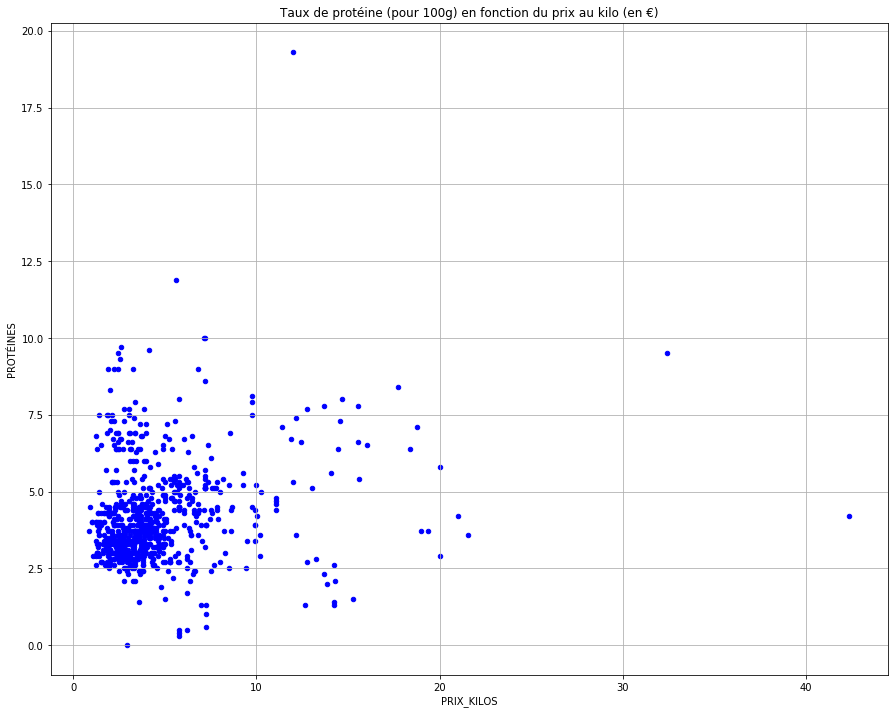

In [9]:
# Taux de protéines en fonction du prix au kilo

df.plot(kind='scatter', x='PRIX_KILOS', y='PROTÉINES', color='blue', figsize=(15, 12),\
        title="Taux de protéine (pour 100g) en fonction du prix au kilo (en €)", grid=True)


In [10]:
# 20 desserts avec le taux de protéines le plus elevé

dprot = df.nlargest(20, 'PROTÉINES')
dprot[['TITRE', 'PROTÉINES']]

,TITRE,PROTÉINES
849,Fromage blanc non affiné,19.3
558,Fromage frais Petits Suisses lait entier MALO,11.9
91,Yaourts SKYR DANONE,10.0
853,Fromage blanc nature Skyr LOGISMOSE,10.0
225,Fromage frais nature 0% MG PETIT YOPLAIT,9.7
227,Fromages frais bio nature CARREFOUR BIO,9.6
552,Fromage frais 0% MG CARREFOUR,9.5
865,Macarons parfums incontournables BRIOCHE PASQU...,9.5
13,Petit Suisse GERVAIS,9.3
179,Fromage frais nature PETIT YOPLAIT,9.0


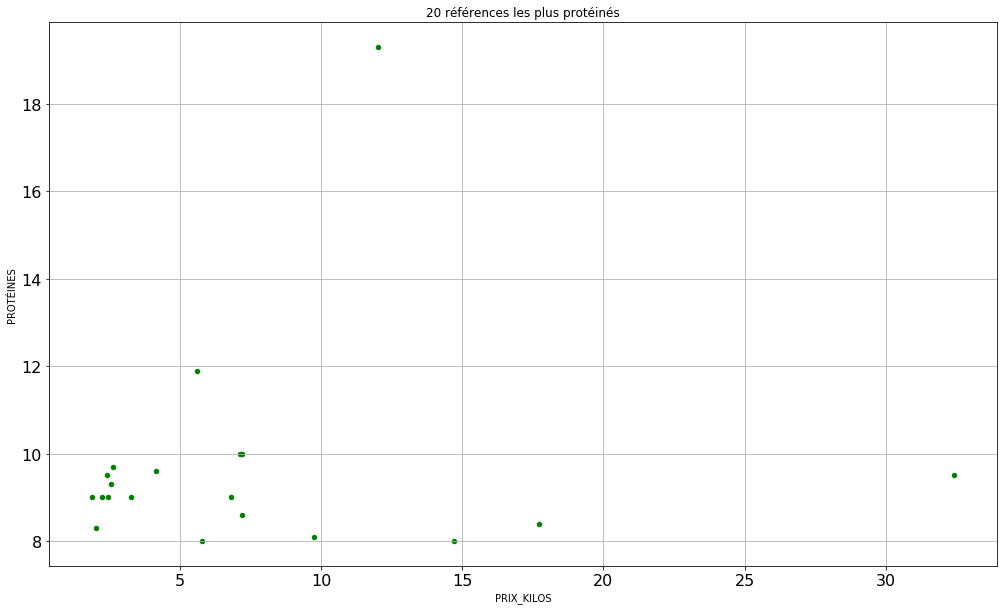

In [11]:
dprot.plot(x='PRIX_KILOS', y='PROTÉINES',kind='scatter', marker='o', color='green', figsize=(17, 10),\
                     grid=True, title='20 références les plus protéinés', fontsize=16)


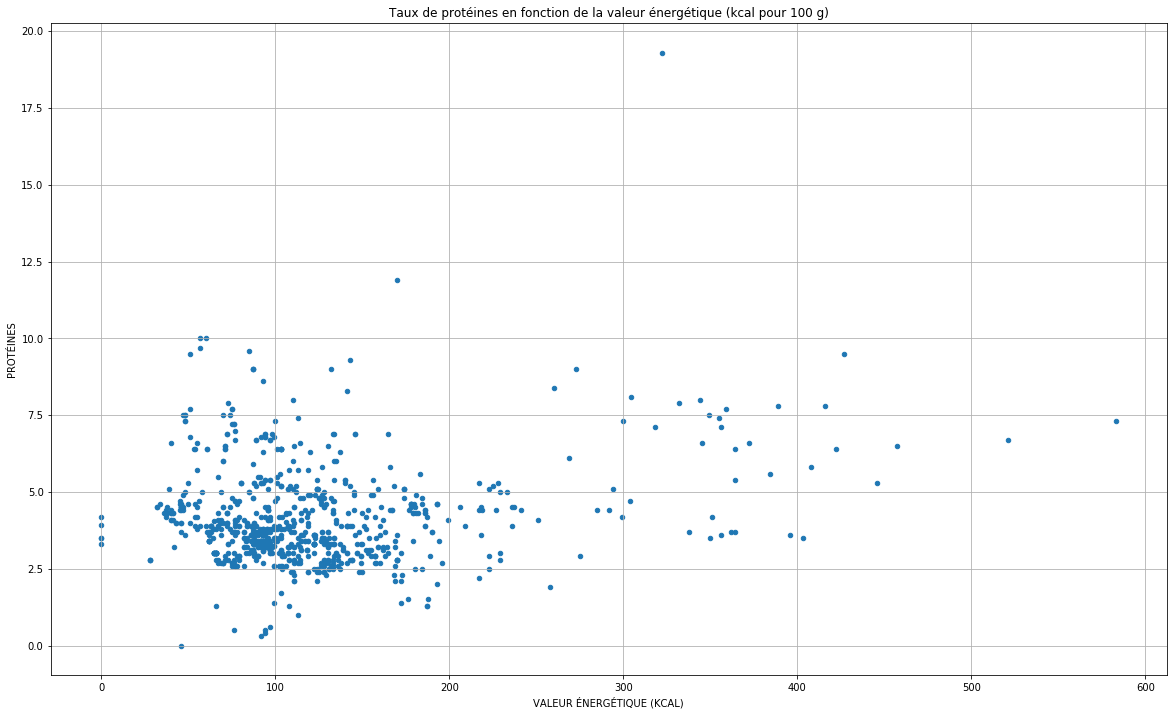

In [13]:
df.plot.scatter('VALEUR ÉNERGÉTIQUE (KCAL)', 'PROTÉINES', \
                title='Taux de protéines en fonction de la valeur énergétique (kcal pour 100 g)', figsize=(20, 12), grid=True)